In [1]:
include("../../src/JuliaMBD.jl")

Main.JuliaMBD

In [2]:
using Plots
using DifferentialEquations
using CSV
using DataFrames
using .JuliaMBD
using .JuliaMBD.Diagram
using LookupTable

In [3]:
@model test begin
    @parameter begin
        a = 1
    end
    df = CSV.read("road_surface.csv", DataFrame)
    @block begin
        c1 = Constant(value=a)
        i = Integrator(in=InPort(:integin), sout=OutPort(:integout))
        f = OneDLookupTable(breaks=df.distance_road_surface, y=df.z_height_road_surface, extrapmethod="ClipEx")
        # f = TrigonometricFunction(in=InPort(:fin), out=OutPort(:fout))
        d = Derivative(in=InPort(:derivin), dout=OutPort(:derivout))
        out1 = Outport(:out1, in=InPort(:out1in))
        # out2 = Outport(:out2, in=InPort(:out2in))
    end
    @connect begin
        c1.out => i.in
        i.out => f.in
        f.out => d.in
        d.out => out1.in
        # f.out => i.in
        # i.out => out2.in
    end
    @scope begin
        out1.out => output1
        # out2.out => output2
    end
end

test (generic function with 1 method)

In [4]:
m = @compile_derivative b = test()

Main.JuliaMBD.ODEModel("Block(test)", var"#16#18"(), var"#19#20"(), var"#21#22"(), var"#23#26"())

In [5]:
JuliaMBD.expr_ifunc_derivative(b)

quote
    function test_ifunc_derivative(; time = 0, a = 1, var"##319" = 0, var"##329" = 0)
        var"##321" = (nothing, nothing)
        var"##318" = 1
        var"##317" = var"##318"
        begin
            var"##335" = var"##329"
        end
        out1in = var"##335"
        var"##324" = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  3599.5, 3599.55, 3599.6, 3599.65, 3599.7, 3599.75, 3599.8, 3599.85, 3599.9, 3599.95]
        begin
            var"##332" = var"##317"
        end
        integin = var"##332"
        begin
            var"##333" = var"##319"
        end
        var"##331" = out1in
        begin
        end
        var"##325" = [0.002337802, 0.006929505, 0.002351349, 0.000465464, 0.000354075, 0.000887611, 0.000748058, 0.000328752, 0.000778706, 0.000730282  …  0.000752394, 0.000373936, 0.000611535, 0.000311205, 0.00075455, 8.1834e-5, 0.000253537, 0.000666529, 0.000874281, 0.000922936]
        var"##328" = "BinarySearch"
        var"##327" = "ClipEx"
   

In [15]:
u0 = [0,0]
u1 = [0,0]
test_sfunc_derivative(0, 0, time=0, a=1, h=0.001)
# test_sfunc(0, 0, time=0, a=1, h=0.001)

MethodError: MethodError: no method matching test_sfunc_derivative(::Int64, ::Int64; time=0, a=1, h=0.001)
Closest candidates are:
  test_sfunc_derivative(::Any, ::Any; time, a) at none:0 got unsupported keyword argument "h"

In [16]:
u0 = [0,0]
u1 = [0,0]
m.sfunc(u0, u1, [1], 0)

BoundsError: BoundsError: attempt to access 1-element Vector{Int64} at index [2]

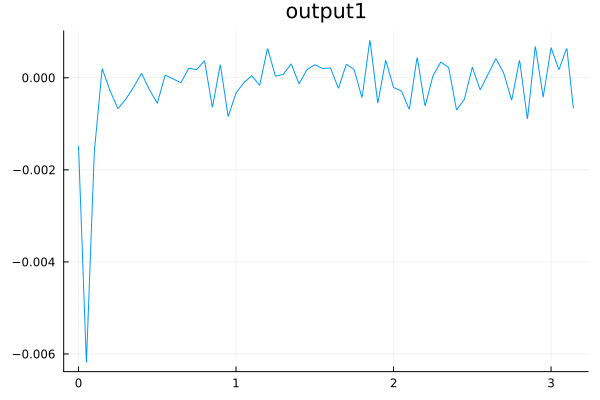

In [6]:
res = simulate(m, tspan=(0,pi))
plot(res)

In [37]:
res.solution

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 7-element Vector{Float64}:
 0.0
 9.999999999999999e-5
 0.0010999999999999998
 0.011099999999999997
 0.11109999999999996
 1.1110999999999995
 3.141592653589793
u: 7-element Vector{Vector{Float64}}:
 [0.0, 0.0]
 [9.999999999999996e-5, 9.999999999999996e-5]
 [0.0010999999999999996, 0.0010999999999999996]
 [0.011099999999999994, 0.011099999999999994]
 [0.11109999999999993, 0.11109999999999993]
 [1.1110999999999993, 1.1110999999999993]
 [3.1415926535897922, 3.1415926535897922]

In [35]:
JuliaMBD.expr_ofunc_derivative(b)

quote
    function test_ofunc_derivative(var"##667", var"##677"; time = 0, a = 1)
        var"##673" = [0.002337802, 0.006929505, 0.002351349, 0.000465464, 0.000354075, 0.000887611, 0.000748058, 0.000328752, 0.000778706, 0.000730282  …  0.000752394, 0.000373936, 0.000611535, 0.000311205, 0.00075455, 8.1834e-5, 0.000253537, 0.000666529, 0.000874281, 0.000922936]
        var"##674" = "LinearPointSlope"
        var"##678" = 0.0
        begin
            var"##681" = var"##667"
        end
        var"##675" = "ClipEx"
        var"##669" = (nothing, nothing)
        begin
            var"##683" = var"##677"
        end
        out1in = var"##683"
        var"##679" = out1in
        begin
        end
        var"##668" = 0.0
        var"##670" = var"##681"
        var"##672" = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45  …  3599.5, 3599.55, 3599.6, 3599.65, 3599.7, 3599.75, 3599.8, 3599.85, 3599.9, 3599.95]
        var"##666" = 1
        var"##665" = var"##666"
        begin
    

In [ ]:
eval(JuliaMBD.expr_sfunc_derivative(b))

In [ ]:
JuliaMBD.expr_ofunc_derivative(b)

In [ ]:
eval(JuliaMBD.expr_ofunc_derivative(b))

In [ ]:
JuliaMBD.expr_ifunc_derivative(b)

In [ ]:
eval(JuliaMBD.expr_ifunc_derivative(b))

In [ ]:
function vv(t)
    h = 0.001
    d, = test_sfunc_derivative(0, time = t)
    ddash, = test_sfunc_derivative(0, time = t+h)
    test_ofunc_derivative((ddash - d) / h, time = t)
end


In [ ]:
t = range(0, 4, 100)
y = [vv(t)[1] for t = t]

In [ ]:
plot(t, y)

In [7]:
@model rlc begin
    @xmlmodel("rlc_deriv.drawio")
    @scope begin
        add.out => out
    end
end

┌ Warning: The port Dict{Any, Any}("label" => "<p style=\"line-height: 100%;\"><br></p>", "name" => "in4", "id" => "7", "parent" => "2", "type" => "inport") has not been used.
└ @ Main.JuliaMBD.Diagram /workspaces/JuliaMBD.jl/src/diagrams/_xml2model.jl:76


rlc (generic function with 1 method)

In [8]:
m = @compile_derivative rlc()

Main.JuliaMBD.ODEModel("Block(rlc)", var"#35#37"(), var"#38#39"(), var"#40#41"(), var"#42#45"())

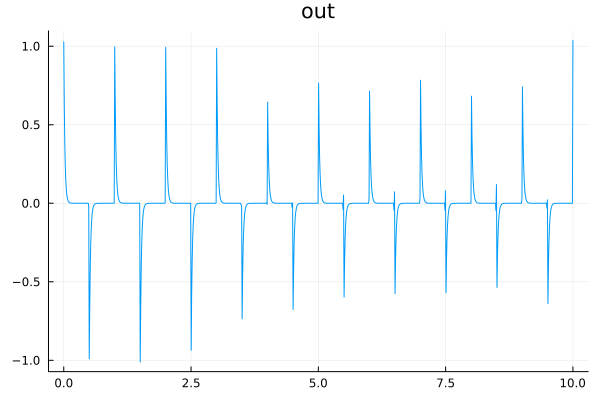

In [9]:
res = simulate(m, tspan=(0,10))
plot(res)